In [2]:
from pathlib import Path
import sys
home = str(Path.home())
sys.path.insert(0, home+"//Desktop//python_libraries//VISA")
import pyvisa
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rm = pyvisa.ResourceManager()
rm.list_resources()

('USB0::0x0AAD::0x01C0::101762::INSTR', 'ASRL1::INSTR', 'ASRL5::INSTR')

In [3]:
com3 = rm.open_resource('ASRL3::INSTR')
com3.write_termination = '\r'
com3.read_termination = '\r'

In [4]:
com4 = rm.open_resource('ASRL4::INSTR')
com4.write_termination = '\r'
com4.read_termination = '\r'

In [5]:
com5 = rm.open_resource('ASRL5::INSTR')
com5.write_termination = '\r'
com5.read_termination = '\r'

In [6]:
com3.write('CURR000')
com4.write('CURR000')
com5.write('CURR000')

(8, <StatusCode.success: 0>)

In [9]:
curr = 1.2
com3.write('CURR'+ f'{int(curr*10):03}')
com4.write('CURR'+ f'{int(curr*10):03}')
com5.write('CURR'+ f'{int(curr*10):03}')

(8, <StatusCode.success: 0>)

In [12]:
volt = 3.0
com3.write('VOLT'+ f'{int(volt*10):03}')
com4.write('VOLT'+ f'{int(volt*10):03}')
com5.write('VOLT'+ f'{int(volt*10):03}')

(8, <StatusCode.success: 0>)

# B/I ratio:

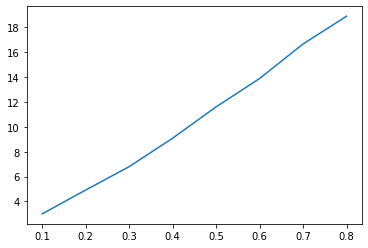

In [3]:
current = np.arange(0.1, 0.9, 0.1)
field = [3, 4.92, 6.8, 9.09, 11.61, 13.89, 16.67, 18.9]
plt.close()
plt.plot(current, field)

In [4]:
print(np.polyfit(current, field, 1))

[23.07619048  0.22571429]


# Temperature evolution:

In [ ]:
time = [0, 6.75, 10, 15, 20, 24, 30.5, 36, 39.6, 45.5, 49.6, 57, 59.6, 66, 71, 77, 80, 84.5, 89.5, 95.5]
temp = [20.8, 21.7, 22.2, 23.0, 23.3, 25.3, 27, 28.4, 29.4, 33.0, 34.4, 37.5, 38.5, 47, 52.1, 56.6, 60.5, 62.4, 68, 73.5]
plt.close()
plt.plot(time, temp)
plt.show()

# Testing:

In [ ]:
def purge(inst):
    i = 0
    while True:
        try:
            inst.read_bytes(1)
            i += 1
        except:
            break
        
    return i

In [ ]:
m3 = purge(com3)
m4 = purge(com4)
m5 = purge(com5)
print("deleted " + str(m3) + " bytes from com3")
print("deleted " + str(m4) + " bytes from com4")
print("deleted " + str(m5) + " bytes from com5")

In [ ]:
def set_field(field, offset = 0.23): #field is measured in mT
    current = (field-offset)/23
    stat3 = com3.query("GETD")
    stat4 = com4.query("GETD")
    stat5 = com5.query("GETD")
    com3.read_bytes(3)
    com4.read_bytes(3) #necessary to get rid of the "OK\r"
    com5.read_bytes(3)
    
    if stat3[-1] == 

In [ ]:
com3.write("VOLT025")
com3.read_bytes(3)
com3.write("CURR030")